In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Pokemon.csv")
names=df["Name"]
df=df.drop(["Legendary","Generation","Type 1","Type 2","#","Name","Total"],1)
print(df)

      HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0     45      49       49       65       65     45
1     60      62       63       80       80     60
2     80      82       83      100      100     80
3     80     100      123      122      120     80
4     39      52       43       60       50     65
5     58      64       58       80       65     80
6     78      84       78      109       85    100
7     78     130      111      130       85    100
8     78     104       78      159      115    100
9     44      48       65       50       64     43
10    59      63       80       65       80     58
11    79      83      100       85      105     78
12    79     103      120      135      115     78
13    45      30       35       20       20     45
14    50      20       55       25       25     30
15    60      45       50       90       80     70
16    40      35       30       20       20     50
17    45      25       50       25       25     35
18    65      90       40      

In [4]:




X=np.array([df[label] for label in df])
X=np.array([(array-np.min(array))/(np.max(array)-np.min(array)) for array in X])

X=X.T
print(X)
batch_size=100
feature_size=6
hidden_size=2

[[ 0.17322835  0.23783784  0.19555556  0.29891304  0.21428571  0.22857143]
 [ 0.23228346  0.30810811  0.25777778  0.38043478  0.28571429  0.31428571]
 [ 0.31102362  0.41621622  0.34666667  0.48913043  0.38095238  0.42857143]
 ..., 
 [ 0.31102362  0.56756757  0.24444444  0.76086957  0.52380952  0.37142857]
 [ 0.31102362  0.83783784  0.24444444  0.86956522  0.52380952  0.42857143]
 [ 0.31102362  0.56756757  0.51111111  0.65217391  0.33333333  0.37142857]]


In [20]:


input_tensor=tf.placeholder(tf.float32,shape=[batch_size,feature_size])

weights1=tf.Variable(tf.truncated_normal(shape=[feature_size,hidden_size],stddev=0.2),name="weights1")
print(weights1.shape)

hidden_layer=tf.nn.tanh(tf.matmul(input_tensor,weights1))

reconstruction=tf.matmul(hidden_layer,tf.transpose(weights1))

loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=input_tensor,logits=reconstruction))

optimizer=tf.train.AdamOptimizer(0.01).minimize(loss)

(6, 2)


In [21]:
iterations=10000
init=tf.global_variables_initializer()
sess=tf.InteractiveSession()
sess.run(init)
data_pointer=0
    
for i in range(iterations):
    input_array=[]
    for _ in range( 0,batch_size):
        input_array.append(X[data_pointer])
        data_pointer=(data_pointer+1)%len(X)
    feed_dict={input_tensor:input_array}    
    sess.run(optimizer,feed_dict=feed_dict) 
    if i%1000==0:
        print("Iteration : {} Loss: {}".format(i,loss.eval(feed_dict=feed_dict)))
weights=weights1.eval()    
        
   
        


Iteration : 0 Loss: 0.6935375928878784
Iteration : 1000 Loss: 0.672625720500946
Iteration : 2000 Loss: 0.6726415157318115
Iteration : 3000 Loss: 0.6726493239402771
Iteration : 4000 Loss: 0.6726535558700562
Iteration : 5000 Loss: 0.6726558804512024
Iteration : 6000 Loss: 0.6726568341255188
Iteration : 7000 Loss: 0.6726575493812561
Iteration : 8000 Loss: 0.6726579070091248
Iteration : 9000 Loss: 0.6726580262184143


In [22]:
print(weights)
    
    

[[ 0.27355754 -0.74531841]
 [ 0.78497708  1.66695607]
 [ 1.13902402 -0.3198508 ]
 [-1.00178313 -0.07171666]
 [ 0.10780525 -1.40835547]
 [-1.28187358  0.58597916]]


In [23]:
projection=np.dot(X,weights).T


saved


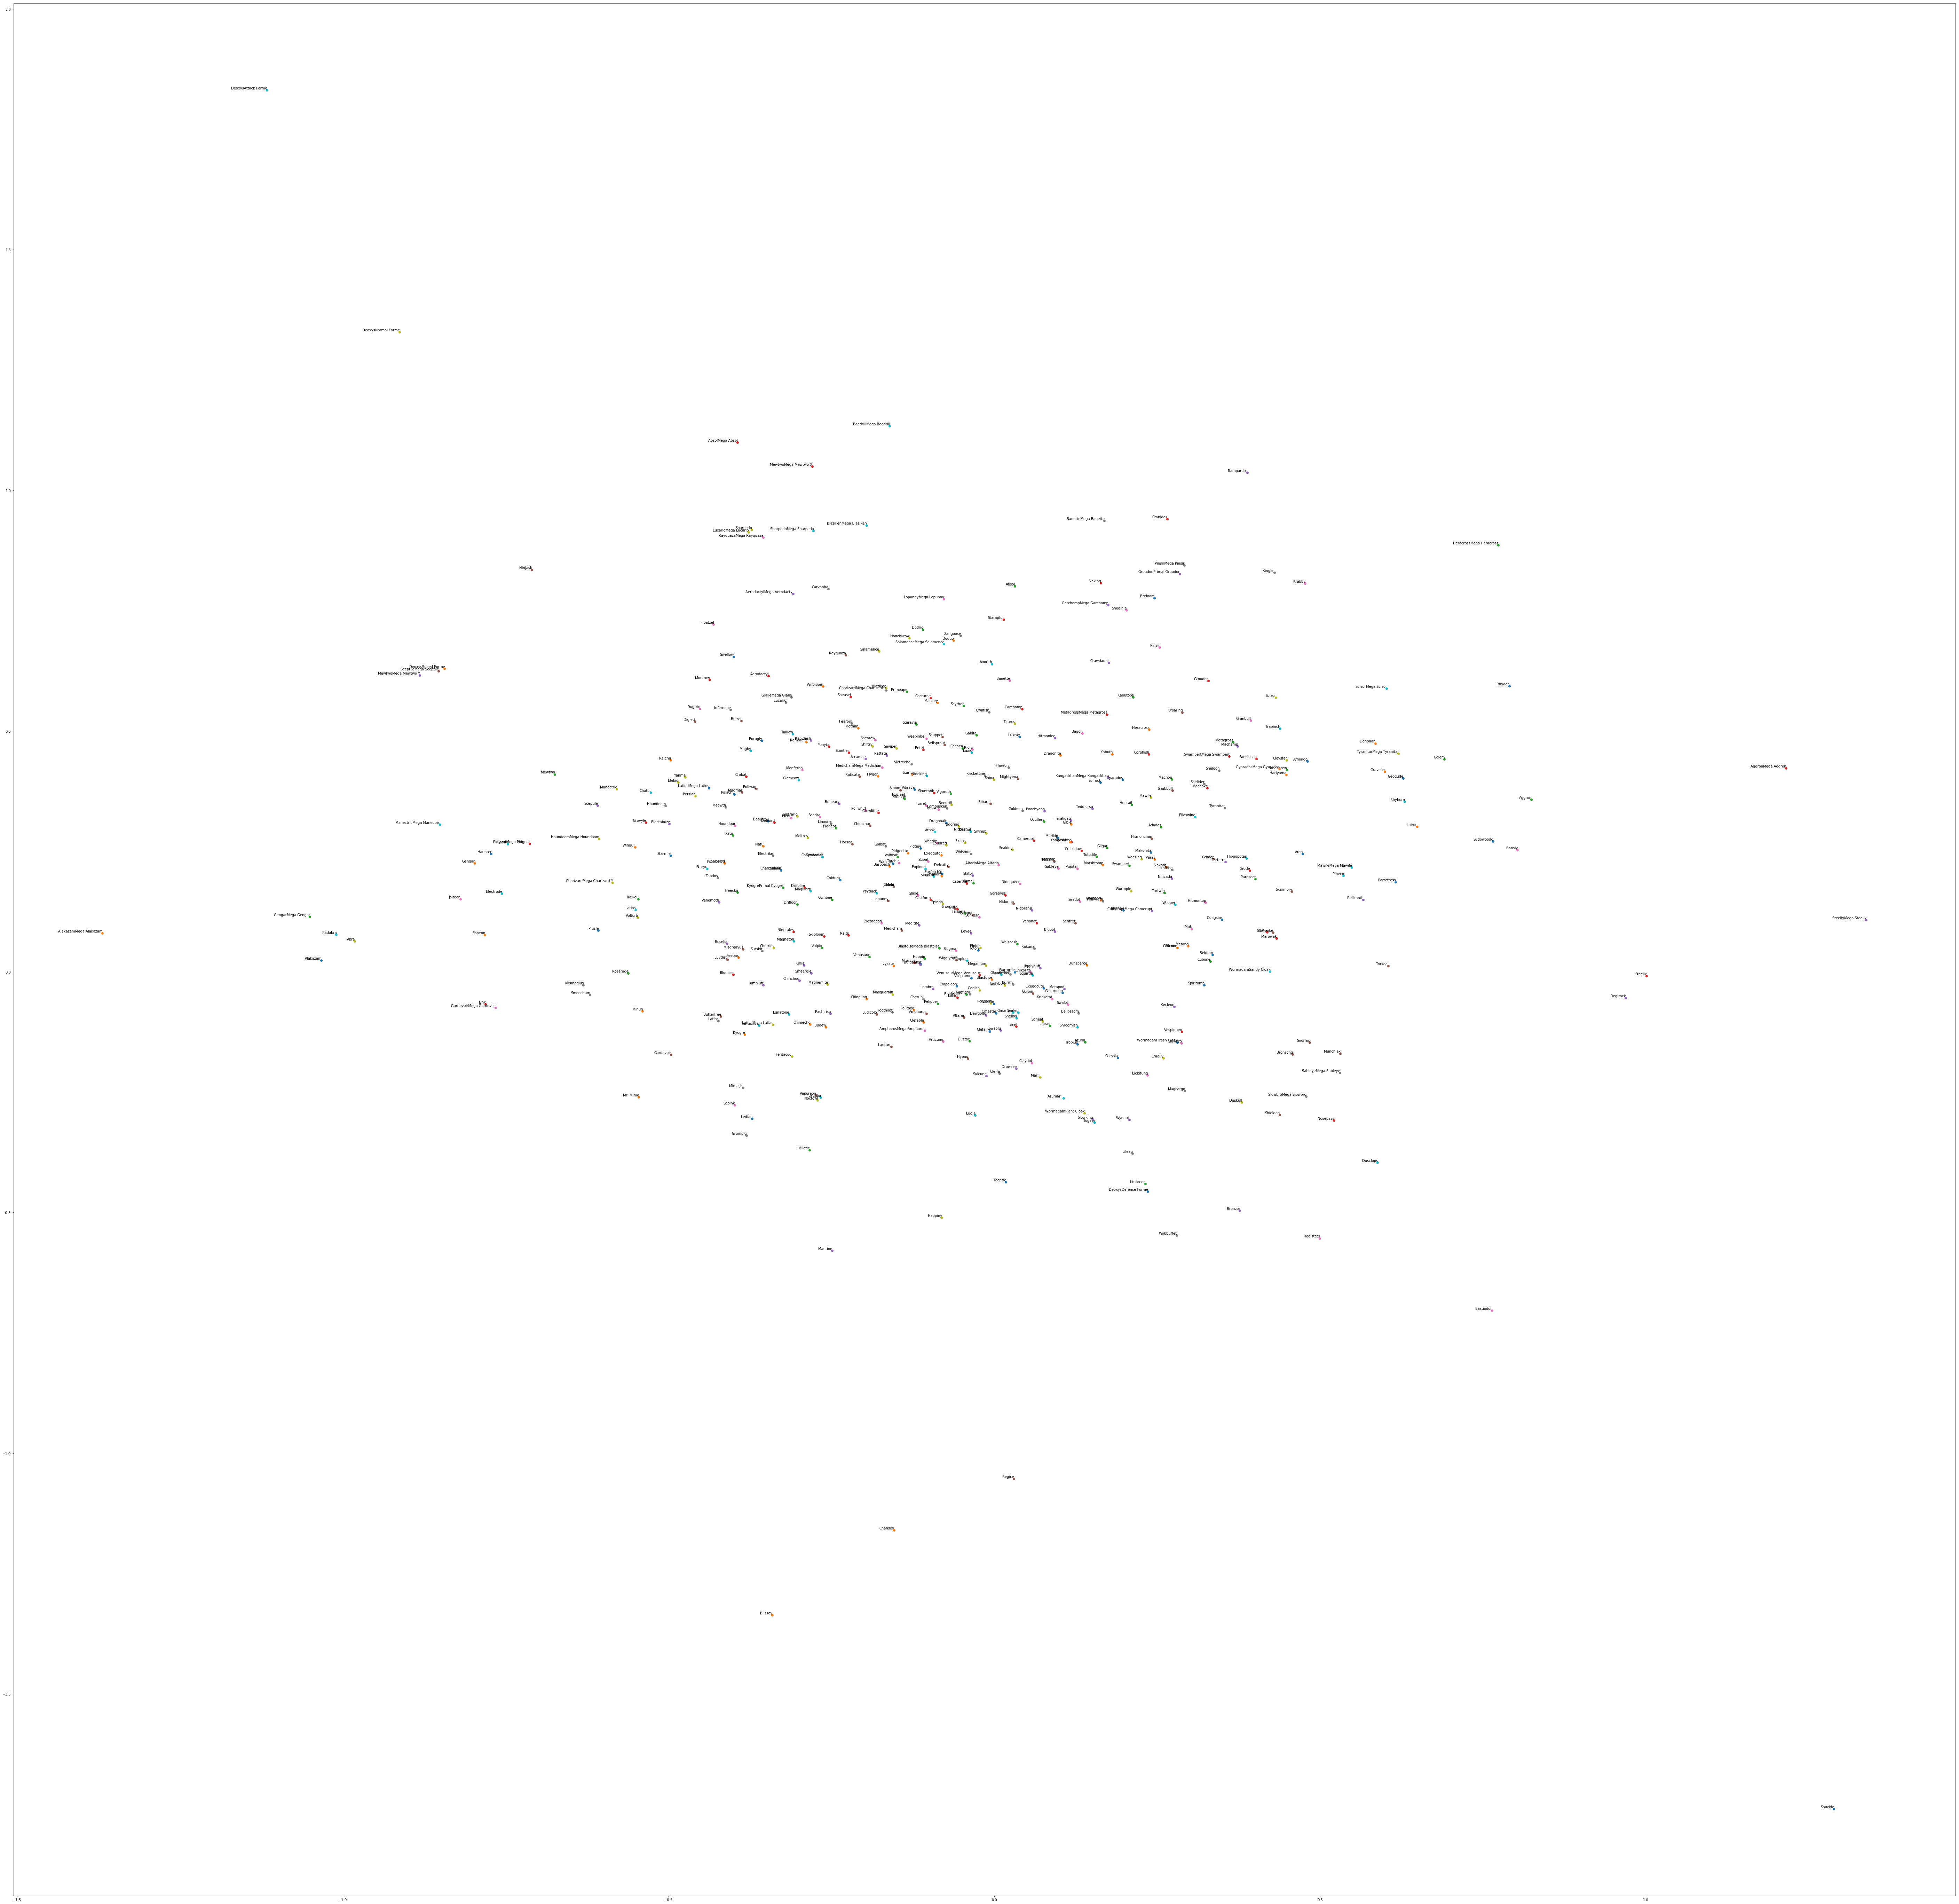

In [24]:
plt.figure(figsize=(100, 100))
num_show=500
filename="pokemon.png"
for i in range(num_show):
    plt.scatter(projection[0][i],projection[1][i])
    plt.annotate(names[i],xy=(projection[0][i],projection[1][i]),xytext=(1,1),textcoords='offset points',ha='right',
                 va='bottom')
plt.savefig(filename)
print("saved")    
plt.show()

saved


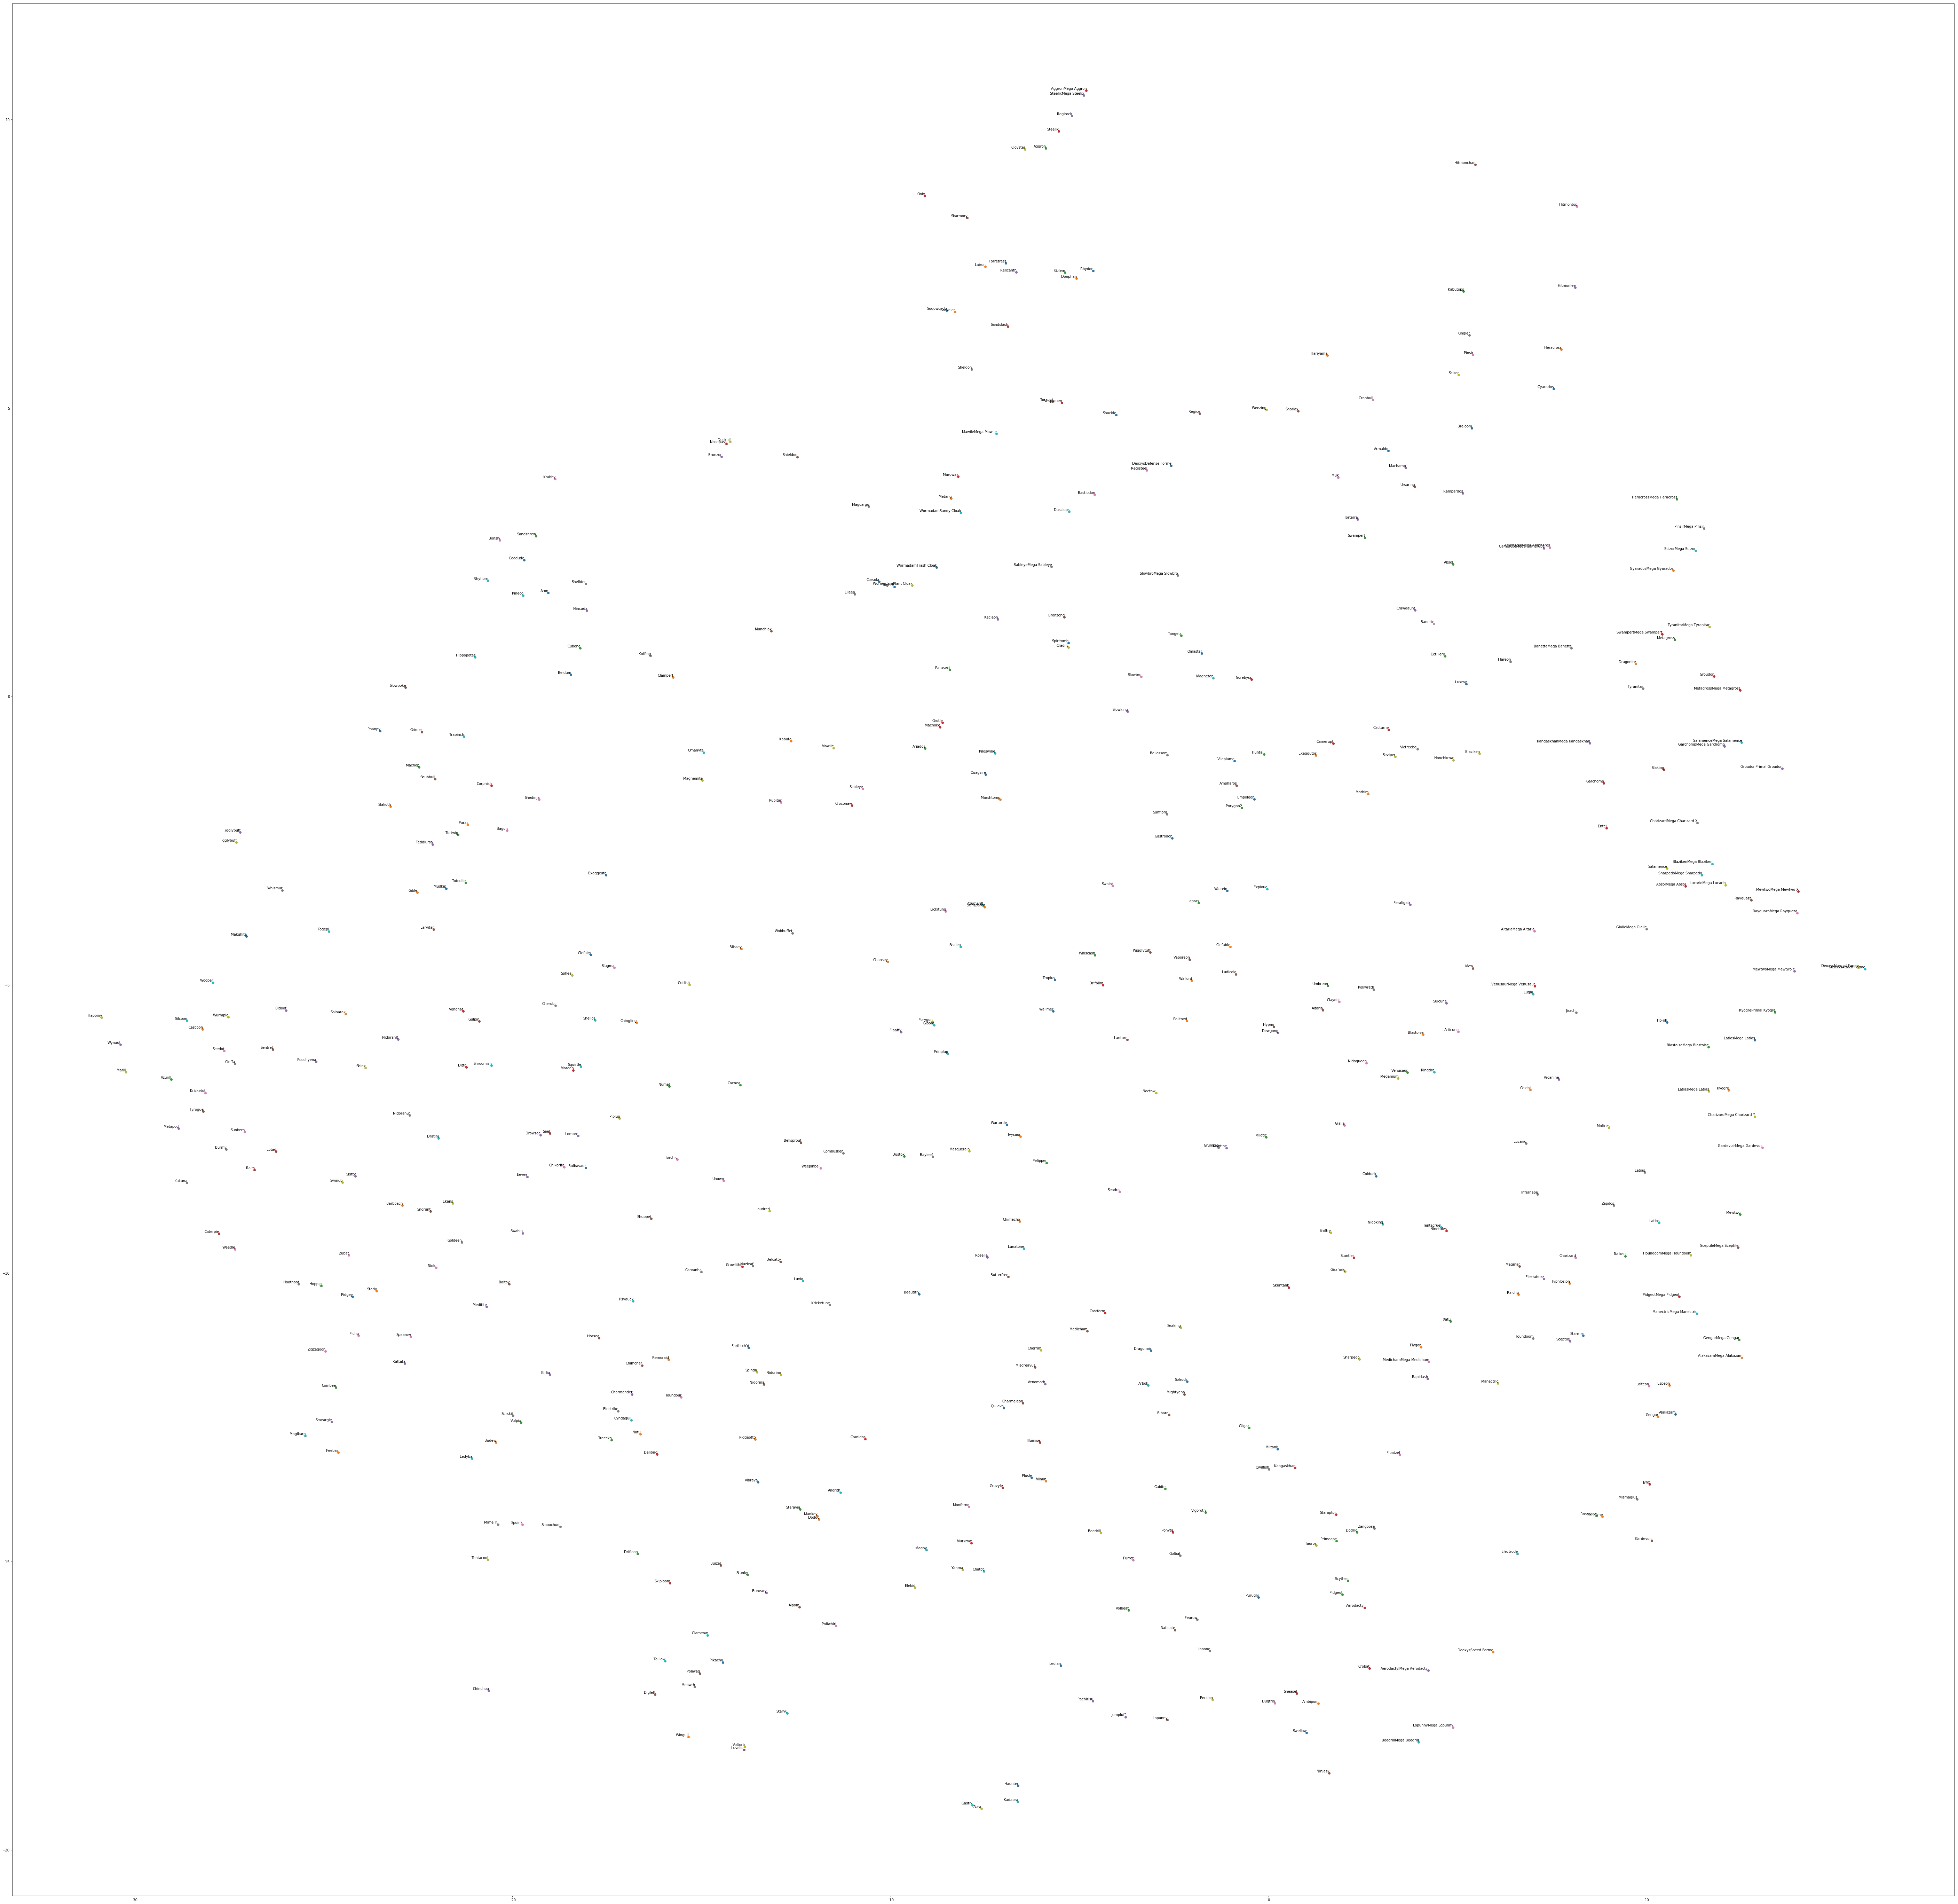

In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 100))

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
projection = tsne.fit_transform(X[:plot_only, :])
projection=projection.T

labels = names
filename="pokemontsne.png"
for i in range(num_show):
    plt.scatter(projection[0][i],projection[1][i])
    plt.annotate(names[i],xy=(projection[0][i],projection[1][i]),xytext=(1,1),textcoords='offset points',ha='right',
                 va='bottom')
plt.savefig(filename)
print("saved")    
plt.show()
   
